In [11]:
import pandas as pd
import seaborn as sns

In [12]:
import numpy as np

In [13]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
import warnings
warnings.filterwarnings('ignore')

# Разделение данных на обучающую и тестовую выборки

In [18]:
data = pd.read_csv('/content/student-mat (1).csv')

<Axes: xlabel='G3', ylabel='Count'>

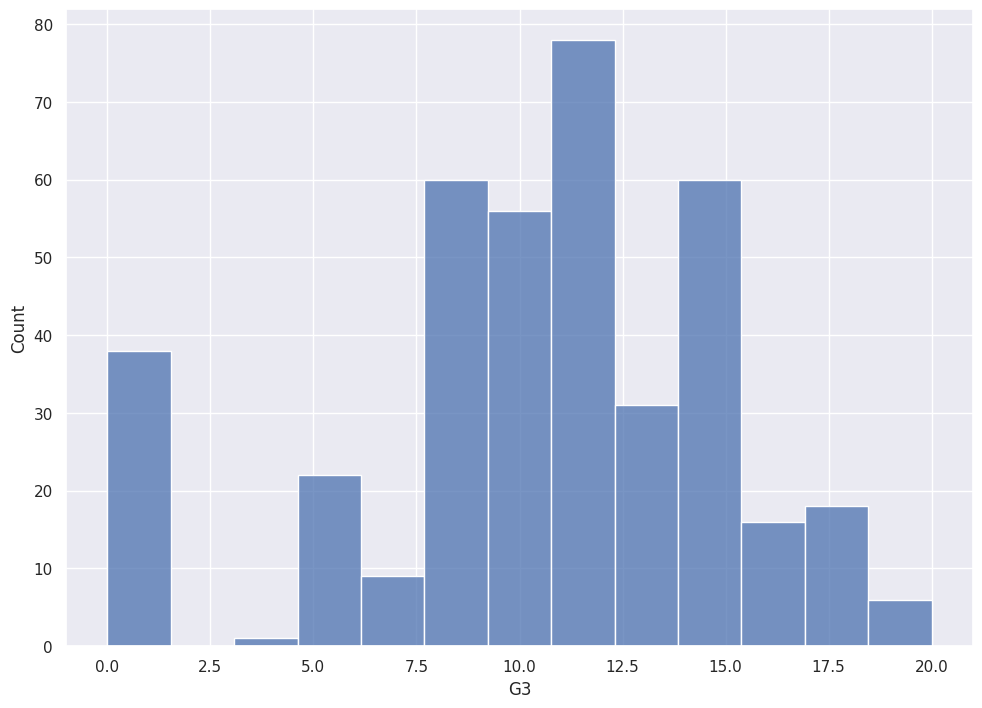

In [19]:
sns.histplot(data['G3'])

In [20]:
data = data[data['G3'] != 0]

In [21]:
X = data.drop(columns=['G3'])
y = data['G3']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, random_state=0)

In [23]:
len(X_train)

307

In [24]:
len(X_test)

50

# Исследовательский анализ данных

In [25]:
X_y_train = X_train.copy(deep=True)

In [26]:
X_y_train['y'] = y_train

# Построим матрицу корреляции между целевым значением  G3 и остальными значениями

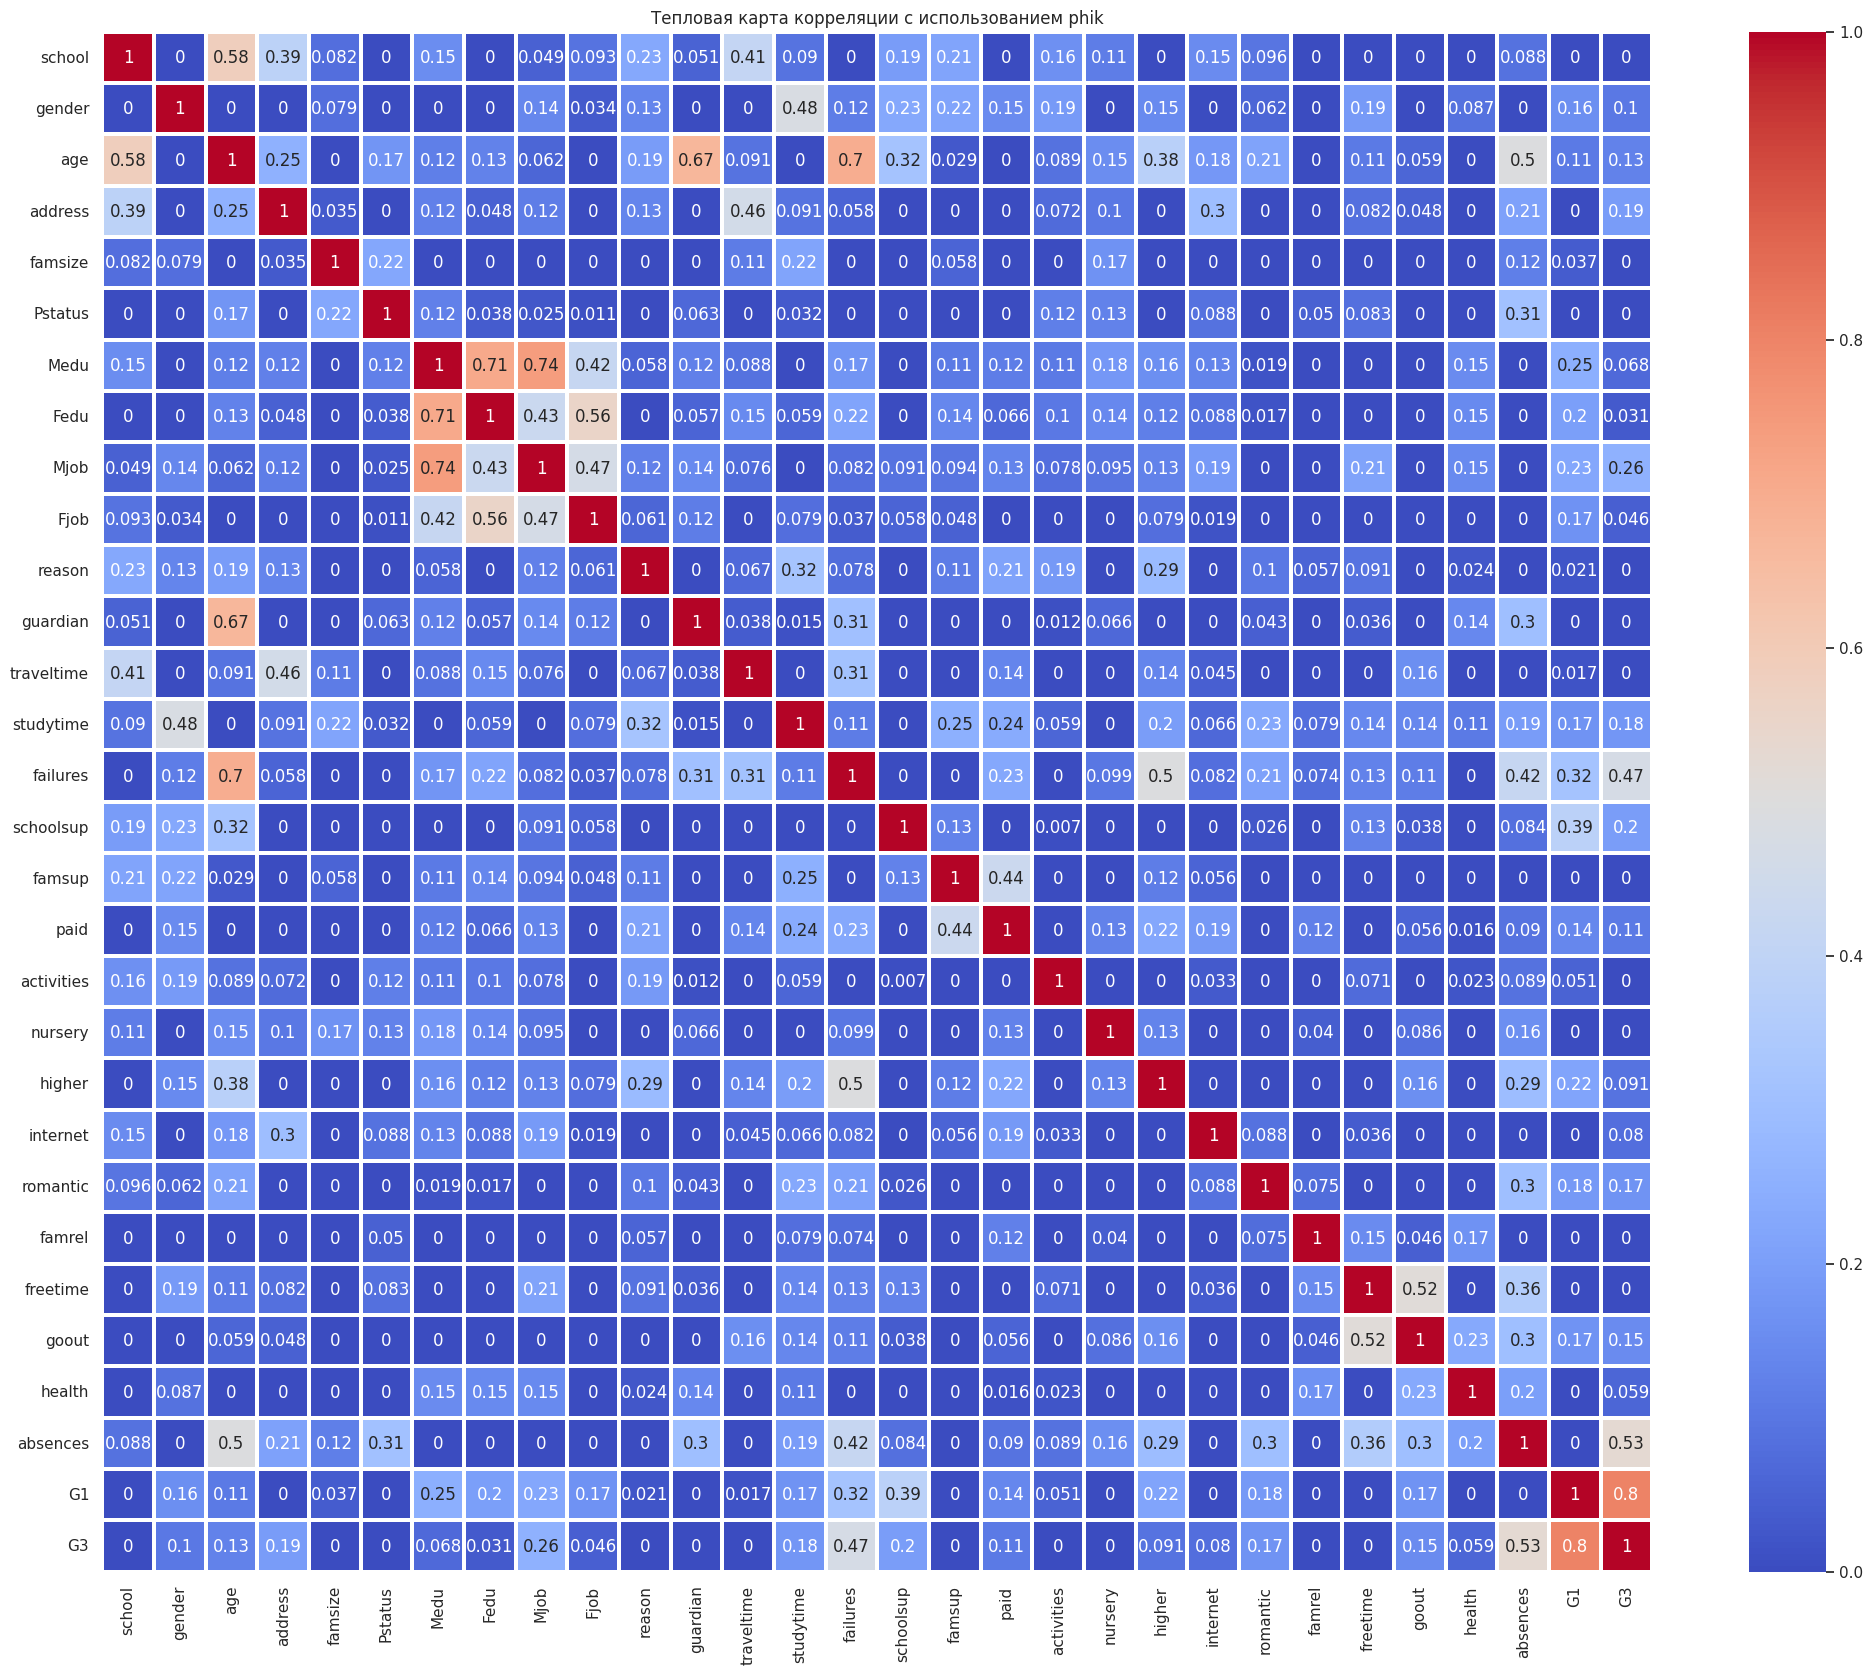

In [27]:
!pip install phik
import phik
from phik import resources, report
from phik.report import plot_correlation_matrix
import matplotlib.pyplot as plt


# Replace with your actual numeric columns
interval_columns = ['age', 'traveltime', 'studytime', 'failures', 'G1', 'G2']

# Calculate the phik correlation matrix
phik_matrix = data.phik_matrix(interval_cols=interval_columns)

# Plot the heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', linewidths=1.5)
plt.title('Тепловая карта корреляции с использованием phik')
plt.show()

<Axes: xlabel='G1', ylabel='y'>

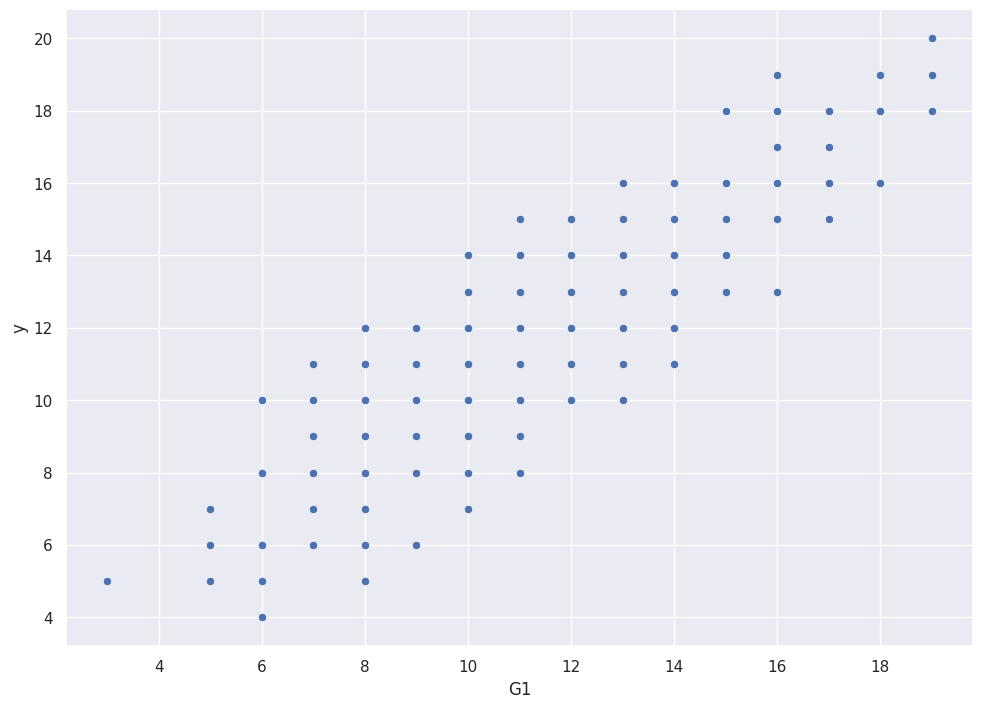

In [28]:
sns.scatterplot(x=X_y_train['G1'], y=X_y_train['y'])

<Axes: xlabel='age', ylabel='y'>

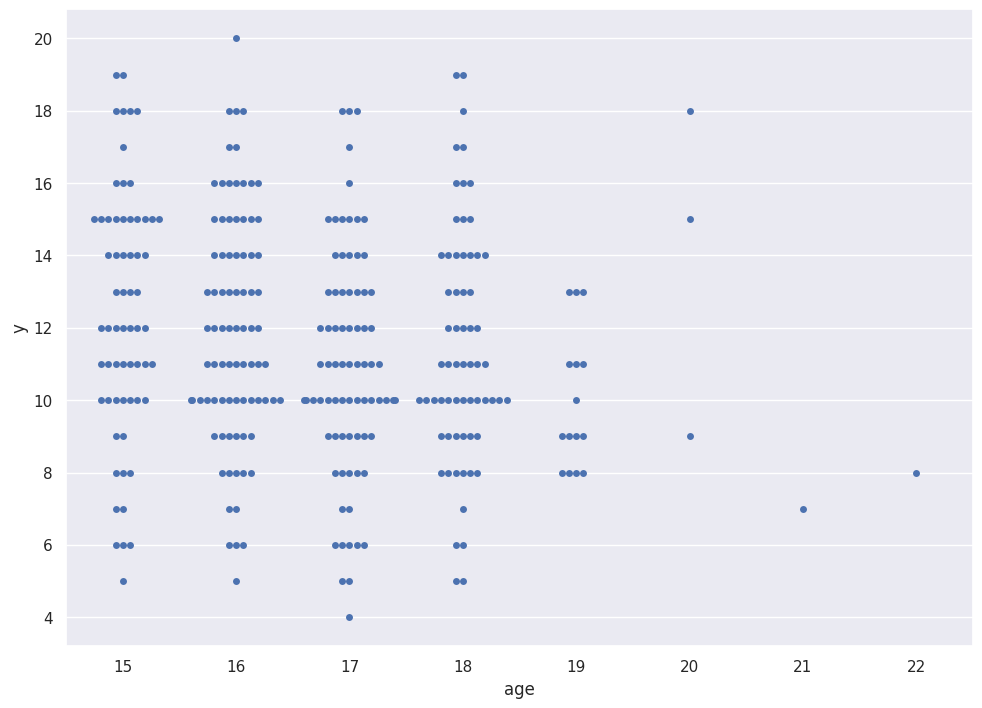

In [29]:
sns.swarmplot(x=X_y_train['age'], y=X_y_train['y'])

In [30]:
numeric_factors_to_use = ['age', 'traveltime', 'G1', 'studytime', 'Medu', 'Fedu', 'failures']

In [31]:
categorical_columns = ['school', 'gender', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
                       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                       'higher', 'internet', 'romantic']

In [32]:
X_y_train \
    .groupby('higher', as_index=False) \
    .agg({'y': 'mean'})

,higher,y
0,no,9.833333
1,yes,11.657627


На основе представленной матрицы корреляции и описания признаков можно сделать следующие выводы о взаимосвязи различных факторов с итоговой оценкой учащегося (G3):
________________________________________
📌 Наиболее значимые положительные корреляции с G3:
1.	G1 (оценка за первый период) — коэффициент корреляции: 0.8
Это самая сильная положительная связь. Оценка за первый период очень хорошо предсказывает итоговую оценку. Это логично, так как оба являются результатами учебной деятельности по одному и тому же предмету.

2.	higher (планирует получать высшее образование) — 0.3
Ученики, планирующие получать высшее образование, в среднем имеют более высокие итоговые оценки.
3.	studytime (время, уделяемое учёбе) — 0.17
Большее время на учёбу связано с более высокими итоговыми оценками.
4.	Medu и Fedu (образование родителей) — 0.2–0.25
Чем выше образование родителей, особенно матери, тем выше склонность ребёнка показывать хорошие результаты.
________________________________________
❌ Наиболее значимые отрицательные корреляции с G3:
1.	failures (число прошлых неудач) — –0.47
Наиболее выраженная отрицательная корреляция. Чем больше у ученика было незачётов, тем ниже его итоговая оценка.
2.	goout (время с друзьями) — –0.23
Чем больше времени ученик проводит с друзьями, тем ниже его академическая успеваемость.
3.	romantic (наличие романтических отношений) — –0.11
Наличие второй половинки немного связано с понижением итоговой оценки.
4.	absences (пропуски занятий) — –0.1
Большее количество пропусков занятий связано с худшими итоговыми оценками.
________________________________________
🔍 Незначительные или слабые корреляции:
Многие переменные, такие как пол (gender), тип школы (school), адрес проживания (address), размер семьи (famsize), доп. занятия (paid), интернет и др. — имеют очень низкую корреляцию (менее ±0.1) с итоговой оценкой, что говорит об их слабом или отсутствующем влиянии в данной выборке.
________________________________________
🧠 Вывод:
Для предсказания итоговой оценки (G3) наиболее полезны следующие признаки:
•	G1 — основной предиктор;
•	failures, studytime, higher, Medu/Fedu, goout, absences — оказывают заметное влияние;
•	Остальные признаки дают слабый вклад или вообще незначимы.


In [33]:
interesting_categorical_factors = ['Mjob', 'Fjob', 'schoolsup', 'higher']

# Подготовка факторов

In [34]:
!pip install category_encoders
from category_encoders.target_encoder import TargetEncoder # This line should work after installation

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.4 MB/s eta 0:00:00


In [35]:
from category_encoders.target_encoder import TargetEncoder

In [36]:
mjob_target_encoder = TargetEncoder()
mjob_target_encoder.fit(X_y_train['Mjob'], X_y_train['y'])

fjob_target_encoder = TargetEncoder()
fjob_target_encoder.fit(X_y_train['Fjob'], X_y_train['y'])

schoolsup_target_encoder = TargetEncoder()
schoolsup_target_encoder.fit(X_y_train['schoolsup'], X_y_train['y'])

higher_target_encoder = TargetEncoder()
higher_target_encoder.fit(X_y_train['higher'], X_y_train['y'])

TargetEncoder(cols=['higher'])

In [37]:
X_y_train['Mjob_encoded'] = mjob_target_encoder.transform(X_y_train['Mjob'])
X_y_train['Fjob_encoded'] = fjob_target_encoder.transform(X_y_train['Fjob'])
X_y_train['schoolsup_encoded'] = schoolsup_target_encoder.transform(X_y_train['schoolsup'])
X_y_train['higher_encoded'] = higher_target_encoder.transform(X_y_train['higher'])

In [38]:
X_y_train

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,health,absences,G1,y,Mjob_encoded,Fjob_encoded,schoolsup_encoded,higher_encoded
295,GP,M,17,U,GT3,T,3,3,health,other,...,4,3,5,4,14,11,12.781907,11.339181,11.835821,11.657627
224,GP,F,16,U,GT3,T,4,4,teacher,services,...,3,2,5,0,13,14,11.734708,11.476373,11.835821,11.657627
197,GP,M,16,R,LE3,T,3,3,teacher,other,...,3,4,3,8,9,10,11.734708,11.339181,11.835821,11.657627
231,GP,M,17,R,GT3,T,2,2,other,other,...,5,2,1,4,11,11,10.963057,11.339181,11.835821,11.657627
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,4,1,6,6,6,10.963057,12.723082,10.094869,11.657627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,MS,F,17,U,LE3,A,3,2,services,other,...,2,3,5,2,12,11,12.251790,11.339181,11.835821,11.657627
210,GP,F,19,U,GT3,T,3,3,other,other,...,3,3,3,10,8,8,10.963057,11.339181,11.835821,11.657627
117,GP,M,16,U,GT3,T,3,3,other,services,...,4,2,5,0,13,13,10.963057,11.476373,11.835821,11.657627
47,GP,M,16,U,GT3,T,4,3,health,services,...,2,2,2,4,19,20,12.781907,11.476373,11.835821,11.657627


In [39]:
factors_to_use = numeric_factors_to_use + ['Mjob_encoded', 'Fjob_encoded', 'schoolsup_encoded', 'higher_encoded']

In [40]:
X_train_encoded = X_y_train.copy(deep=True)

In [41]:
X_train_encoded = X_train_encoded[factors_to_use]

In [42]:
X_train_encoded

,age,traveltime,G1,studytime,Medu,Fedu,failures,Mjob_encoded,Fjob_encoded,schoolsup_encoded,higher_encoded
295,17,1,14,1,3,3,0,12.781907,11.339181,11.835821,11.657627
224,16,1,13,3,4,4,0,11.734708,11.476373,11.835821,11.657627
197,16,3,9,1,3,3,0,11.734708,11.339181,11.835821,11.657627
231,17,2,11,2,2,2,0,10.963057,11.339181,11.835821,11.657627
7,17,2,6,2,4,4,0,10.963057,12.723082,10.094869,11.657627
...,...,...,...,...,...,...,...,...,...,...,...
357,17,2,12,2,3,2,0,12.251790,11.339181,11.835821,11.657627
210,19,1,8,4,3,3,0,10.963057,11.339181,11.835821,11.657627
117,16,2,13,1,3,3,0,10.963057,11.476373,11.835821,11.657627
47,16,1,19,4,4,3,0,12.781907,11.476373,11.835821,11.657627


In [43]:
X_train_encoded.head(6)

,age,traveltime,G1,studytime,Medu,Fedu,failures,Mjob_encoded,Fjob_encoded,schoolsup_encoded,higher_encoded
295,17,1,14,1,3,3,0,12.781907,11.339181,11.835821,11.657627
224,16,1,13,3,4,4,0,11.734708,11.476373,11.835821,11.657627
197,16,3,9,1,3,3,0,11.734708,11.339181,11.835821,11.657627
231,17,2,11,2,2,2,0,10.963057,11.339181,11.835821,11.657627
7,17,2,6,2,4,4,0,10.963057,12.723082,10.094869,11.657627
64,15,1,10,2,4,3,0,12.251790,11.476373,10.094869,11.657627


In [44]:
scaler = MinMaxScaler()
scaler.fit(X_train_encoded)

MinMaxScaler()

In [45]:
X_train_scaled = scaler.transform(X_train_encoded)

In [46]:
y_train

,G3
295,11
224,14
197,10
231,11
7,6
...,...
357,11
210,8
117,13
47,20


# Создание модели

In [47]:
model = LinearRegression()

In [48]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [49]:
model.score(X_train_scaled, y_train)

0.8206863785263498

# Оценка качества

In [50]:
X_test['Mjob_encoded'] = mjob_target_encoder.transform(X_test['Mjob'])
X_test['Fjob_encoded'] = fjob_target_encoder.transform(X_test['Fjob'])
X_test['schoolsup_encoded'] = schoolsup_target_encoder.transform(X_test['schoolsup'])
X_test['higher_encoded'] = higher_target_encoder.transform(X_test['higher'])

In [51]:
X_test_encoded = X_test[factors_to_use]

In [52]:
X_test_scaled = scaler.transform(X_test_encoded)

In [53]:
model.score(X_test_scaled, y_test)

0.7278059083711641

In [54]:
model.predict(X_test_scaled)

array([12.28973536, 11.16057207,  9.22847546, 12.4171255 ,  7.96640494,
        7.58879649, 10.43342026, 10.87751139, 14.94288024, 15.30810275,
       12.50292408, 12.62678505, 14.26557074, 14.11290565,  9.08506111,
       11.07263249, 13.92266825, 14.04234316, 15.97583319, 12.24577748,
        6.69736088, 15.73123848,  8.9811407 , 10.87325769,  7.8918567 ,
       12.94246639, 12.40655858,  8.62095996, 14.31107984,  7.88097415,
        7.67250753,  7.8969954 , 12.17297401,  8.88633288, 10.73263861,
       14.10612511, 12.05292006,  7.93129161, 11.66573143, 18.12350829,
       13.70410088, 12.85960961, 15.16757594,  9.28737376,  7.00744211,
       13.65554177,  8.18414173,  9.23857638, 11.22469894, 13.39906456])

In [55]:
def score_model(model, X_test, y_test):
    y_preds = model.predict(X_test)

    errs = []

    for y, y_pred in zip(y_test, y_preds):
        errs.append(abs(y - y_pred))

    mae = sum(errs) / len(errs)

    mean_y_test = sum(y_test) / len(y_test)
    r2 = 1 - sum(err ** 2 for err in errs) / sum((y - mean_y_test) ** 2 for y in y_test)

    return mae, r2

In [56]:
score_model(model, X_test_scaled, y_test)

(np.float64(1.2899322007832235), np.float64(0.7278059083711641))

In [57]:
maes = []
r2s = []

X_y_test = X_test_encoded.copy(deep=True)
X_y_test['y'] = y_test

for i in range(1000):
    X_y_sample = X_y_test.sample(len(X_y_test), replace=True)

    X_test_sample = X_y_sample.drop(columns=['y'])
    X_test_sample = scaler.transform(X_test_sample)
    y_test_sample = X_y_sample['y']

    mae_sample, r2_sample = score_model(model, X_test_sample, y_test_sample)

    maes.append(mae_sample)
    r2s.append(r2_sample)

In [58]:
maes = list(sorted(maes))

In [59]:
maes = maes[25:975]

In [60]:
maes[0], maes[-1]

(np.float64(1.0590760654205271), np.float64(1.5396661049559048))

<Axes: ylabel='Count'>

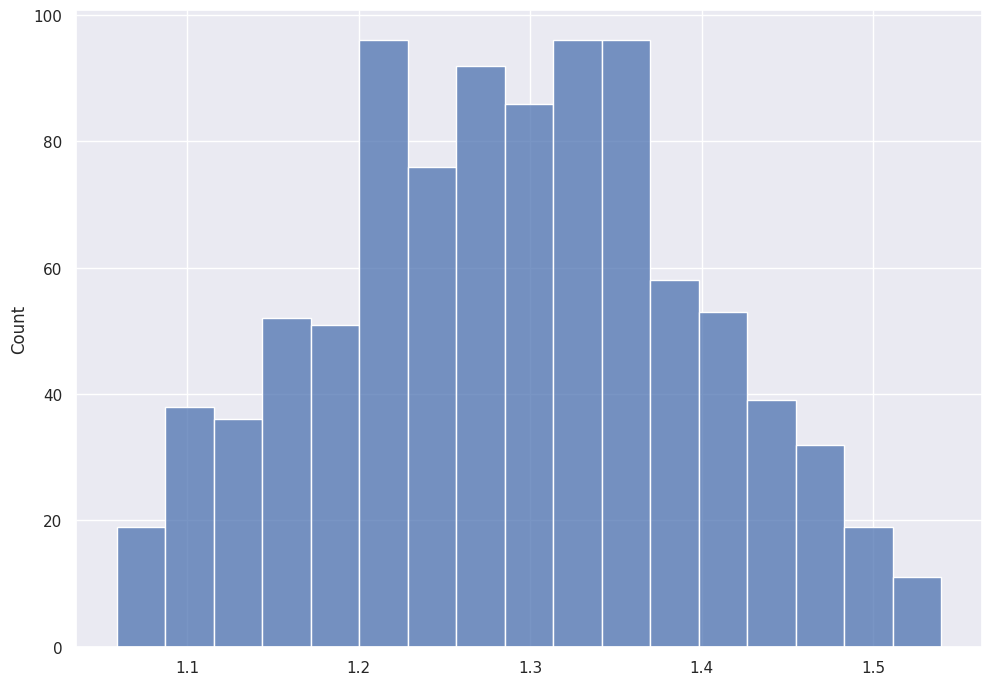

In [61]:
sns.histplot(maes)

# Интерпретация модели

In [62]:
model.coef_

array([-2.06518364e+00, -1.01854381e-01,  1.40527065e+01,  2.45512549e-01,
        3.84307987e-01, -4.39096593e-01,  5.01665694e-02,  4.29031890e-01,
       -2.22934549e-03,  1.72824110e-01, -2.68099833e-01])

In [63]:
for x, y in zip(X_train_encoded.columns, model.coef_):
    print(x, round(y, 2))

age -2.07
traveltime -0.1
G1 14.05
studytime 0.25
Medu 0.38
Fedu -0.44
failures 0.05
Mjob_encoded 0.43
Fjob_encoded -0.0
schoolsup_encoded 0.17
higher_encoded -0.27


In [64]:
X_y_train.groupby('age').agg({'y': 'mean'})

,y
age,
15,12.412698
16,11.963855
17,10.961039
18,11.421875
19,10.000000
20,14.000000
21,7.000000
22,8.000000


<Axes: xlabel='age', ylabel='y'>

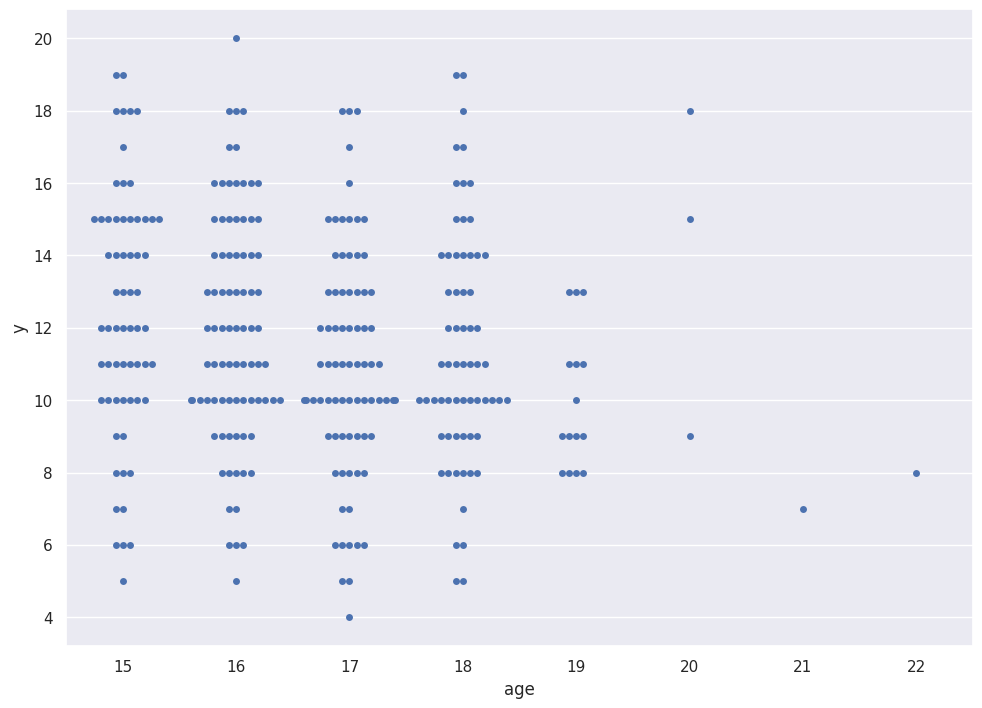

In [65]:
sns.swarmplot(x=X_y_train['age'], y=X_y_train['y'])

ИСпользуем Random Forest для предсказания

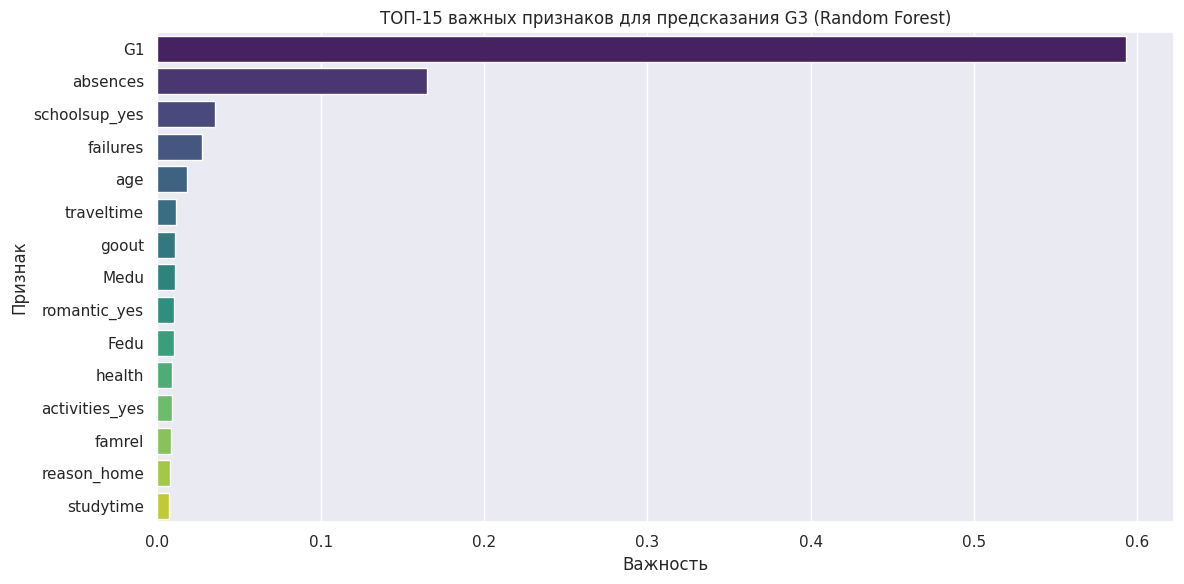

In [66]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Загрузка данных
df = pd.read_csv("/content/student-mat (1).csv")  # Название файла, измени при необходимости

# Преобразование категориальных признаков в числовые
df_encoded = pd.get_dummies(df, drop_first=True)

# Делим на признаки и целевую переменную
X = df_encoded.drop('G3', axis=1)
y = df_encoded['G3']

# Деление на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели Random Forest
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Получение важности признаков
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Признак': features, 'Важность': importances})
importance_df = importance_df.sort_values(by='Важность', ascending=False).head(15)

# Построение графика
plt.figure(figsize=(12, 6))
sns.barplot(x='Важность', y='Признак', data=importance_df, palette='viridis')
plt.title('ТОП-15 важных признаков для предсказания G3 (Random Forest)')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.tight_layout()
plt.show()


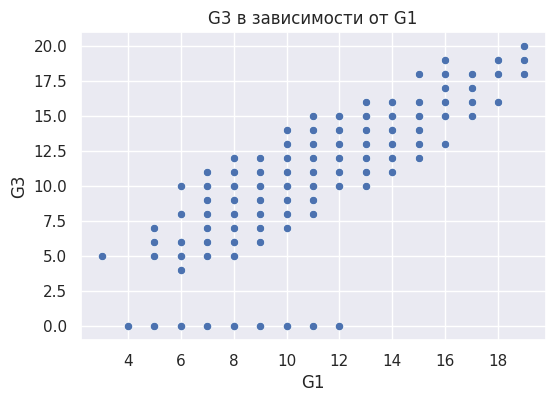

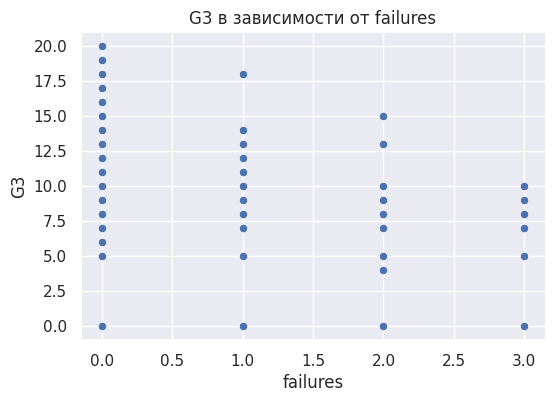

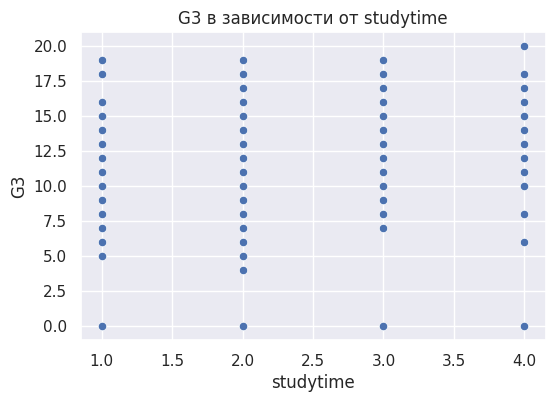

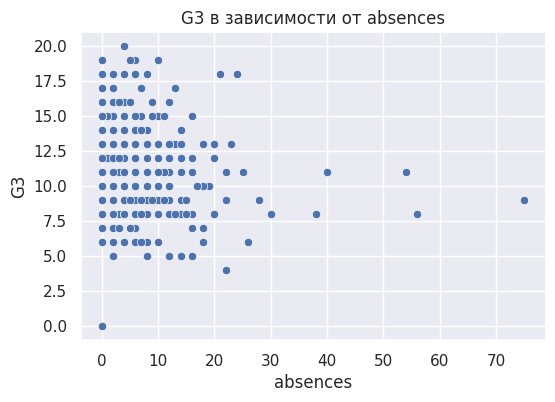

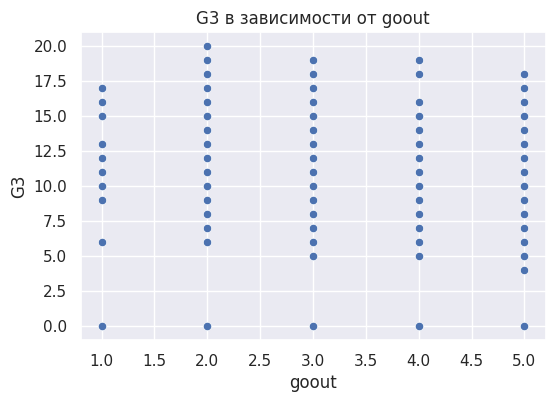

In [67]:
important_features = ['G1', 'failures', 'studytime', 'absences', 'goout']

# Построение графиков рассеяния
for feature in important_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=feature, y='G3', data=df)
    plt.title(f'G3 в зависимости от {feature}')
    plt.xlabel(feature)
    plt.ylabel('G3')
    plt.grid(True)
    plt.show()


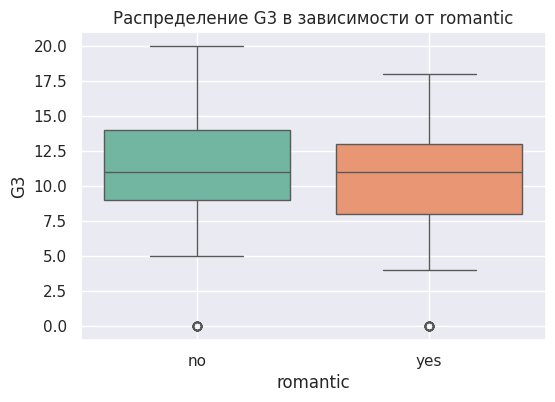

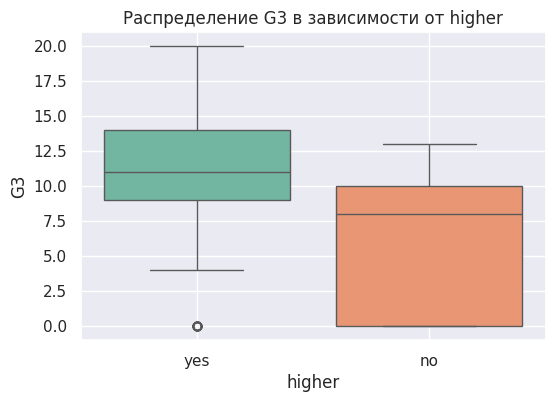

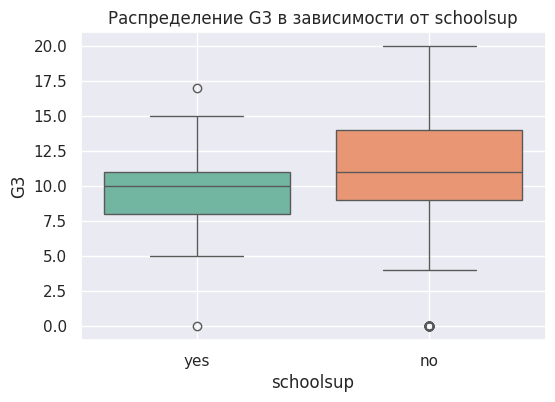

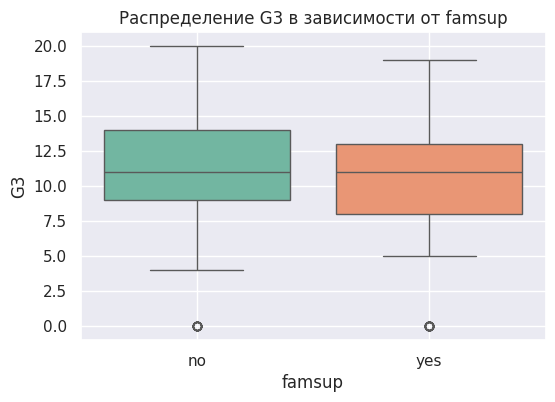

In [68]:
categorical_features = ['romantic', 'higher', 'schoolsup', 'famsup']

# Построение boxplot для категориальных признаков
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=feature, y='G3', data=df, palette='Set2')
    plt.title(f'Распределение G3 в зависимости от {feature}')
    plt.xlabel(feature)
    plt.ylabel('G3')
    plt.grid(True)
    plt.show()


Сравнение random forest и Линейной регресиии

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Обучение линейной регрессии
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lr = linreg.predict(X_test)

# Обучение Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Функция для вывода метрик
def print_metrics(y_true, y_pred, model_name):
    print(f"\n📊 Метрики для модели: {model_name}")
    print(f"MAE (средняя абсолютная ошибка): {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"MSE (среднеквадратичная ошибка): {mean_squared_error(y_true, y_pred):.2f}")
    print(f"RMSE (корень из MSE): {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R² (коэффициент детерминации): {r2_score(y_true, y_pred):.2f}")

# Вывод метрик
print_metrics(y_test, y_pred_lr, "Линейная регрессия")
print_metrics(y_test, y_pred_rf, "Random Forest")



📊 Метрики для модели: Линейная регрессия
MAE (средняя абсолютная ошибка): 2.29
MSE (среднеквадратичная ошибка): 8.54
RMSE (корень из MSE): 2.92
R² (коэффициент детерминации): 0.58

📊 Метрики для модели: Random Forest
MAE (средняя абсолютная ошибка): 1.69
MSE (среднеквадратичная ошибка): 5.72
RMSE (корень из MSE): 2.39
R² (коэффициент детерминации): 0.72


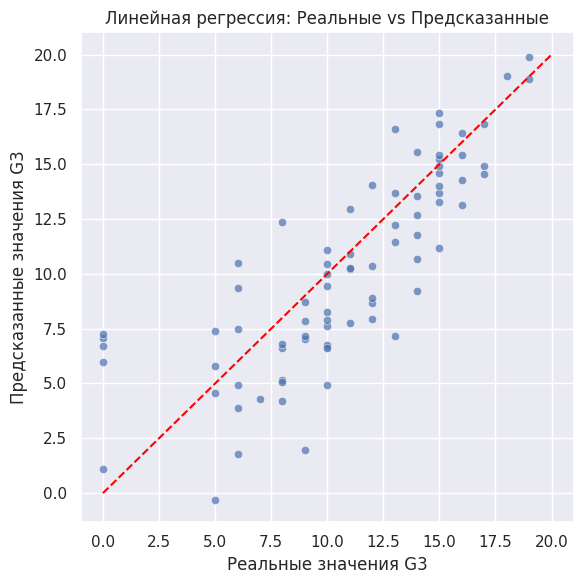

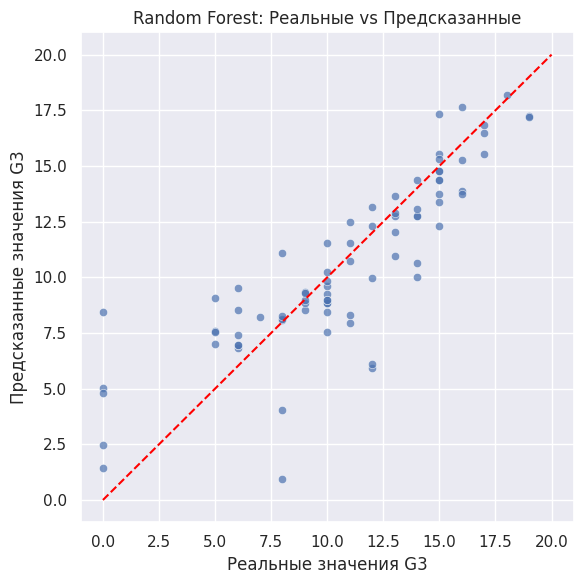

In [70]:
# Визуализация: реальные значения против предсказанных
def plot_predictions(y_true, y_pred, model_name):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.7)
    plt.plot([0, 20], [0, 20], '--', color='red')  # диагональ: идеальное совпадение
    plt.xlabel('Реальные значения G3')
    plt.ylabel('Предсказанные значения G3')
    plt.title(f'{model_name}: Реальные vs Предсказанные')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Построим графики
plot_predictions(y_test, y_pred_lr, "Линейная регрессия")
plot_predictions(y_test, y_pred_rf, "Random Forest")


Чем ближе точки к красной диагонали , тем точнее предсказание.

Если в Random Forest точки более плотно располагаются по диагонали, чем при линейной регрессии — это подтверждается, что модель лучше справляется с задачей.


📊 Метрики для модели: Gradient Boosting
MAE (средняя абсолютная ошибка): 1.74
MSE (среднеквадратичная ошибка): 5.86
RMSE (корень из MSE): 2.42
R² (коэффициент детерминации): 0.71


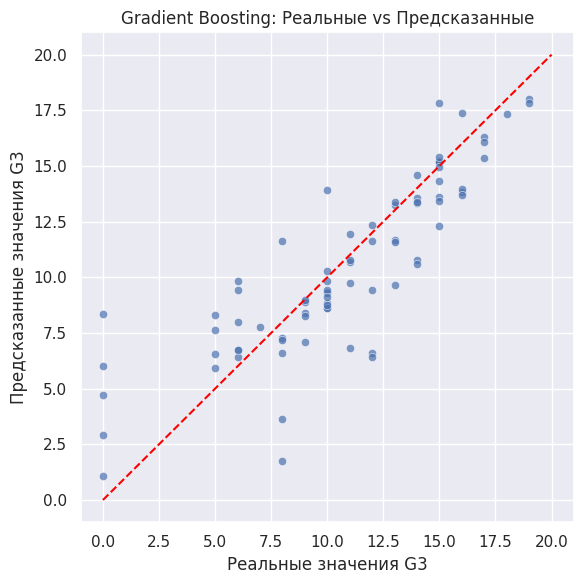

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

# Обучение модели градиентного бустинга
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

# Метрики
print_metrics(y_test, y_pred_gbr, "Gradient Boosting")

# Визуализация предсказаний
plot_predictions(y_test, y_pred_gbr, "Gradient Boosting")


Попробуем поменять в Случайном лесе количество ветвлений с 100 до 200, в градиентом бустинге ветвлений увеличим до 150 и уменьшим обучающий шаг с 0,1 до 0,07

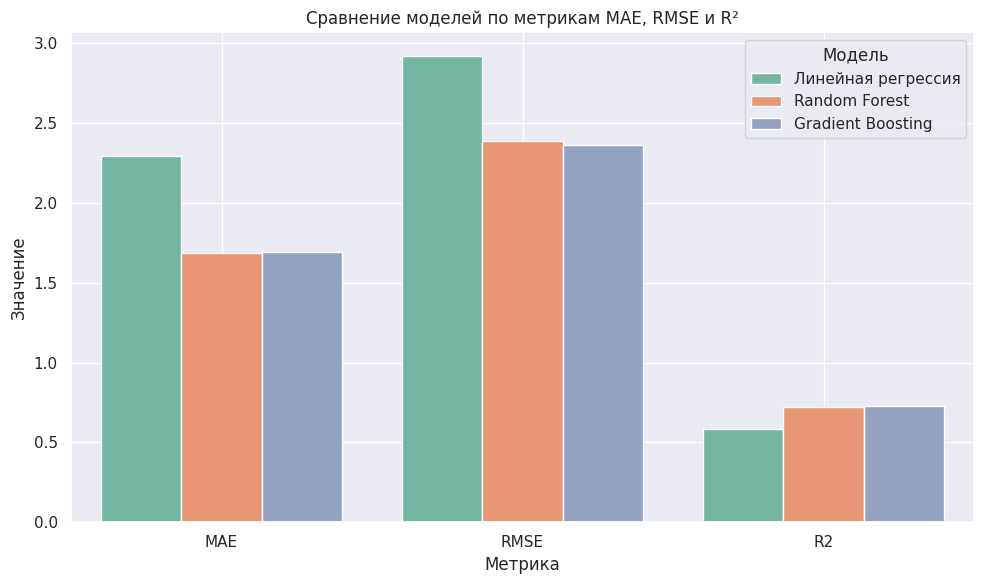

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Словарь для хранения метрик
metrics = {}

# Обучение моделей и расчет метрик
models = {
    'Линейная регрессия': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=200, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=150, learning_rate=0.07, random_state=42)
}

# Обучение и предсказания
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    metrics[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}

# Преобразуем словарь в DataFrame
metrics_df = pd.DataFrame(metrics).T.reset_index().rename(columns={'index': 'Модель'})

# Построим график
plt.figure(figsize=(10, 6))
metrics_melted = metrics_df.melt(id_vars='Модель', var_name='Метрика', value_name='Значение')
sns.barplot(data=metrics_melted, x='Метрика', y='Значение', hue='Модель', palette='Set2')
plt.title('Сравнение моделей по метрикам MAE, RMSE и R²')
plt.ylabel('Значение')
plt.xlabel('Метрика')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Модель')
plt.show()


На основе представленного графика сравнения моделей по метрикам **MAE**, **RMSE** и **R²**, можно сделать следующие выводы:

---

### 📊 **Анализ результатов:**

- **MAE (средняя абсолютная ошибка):**
  - Наименьшее значение у моделей **Random Forest** и **Gradient Boosting** — они ошибаются в среднем на меньшую величину по сравнению с линейной регрессией.
  - Линейная регрессия показывает наибольшую ошибку, что свидетельствует о менее точных предсказаниях.

- **RMSE (корень из среднеквадратичной ошибки):**
  - Снова **Gradient Boosting** и **Random Forest** имеют меньшие значения по сравнению с линейной регрессией. Это говорит о том, что их предсказания более устойчивы и реже дают сильные отклонения от истинных значений.

- **R² (коэффициент детерминации):**
  - Наивысшее значение R² — у **Random Forest** и **Gradient Boosting**, что указывает на лучшее объяснение дисперсии итоговых оценок (G3).
  - Линейная регрессия хуже моделирует взаимосвязь между признаками и результатом.

---

### ✅ **Вывод:**
**Gradient Boosting** и **Random Forest** значительно превосходят линейную регрессию по всем ключевым метрикам.  
Среди них небольшое преимущество имеет **Gradient Boosting**, так как он сочетает высокую точность (низкие ошибки) с высокой объясняющей способностью (высокий R²).

🔹 **Рекомендуемая модель для предсказания G3:**  
➡ **Gradient Boosting**



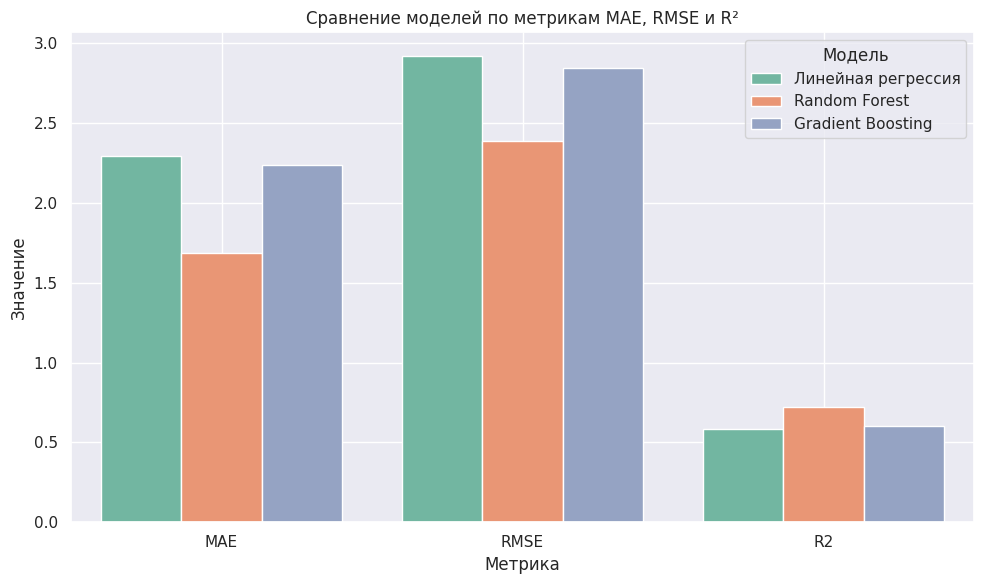

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Словарь для хранения метрик
metrics = {}

# Обучение моделей и расчет метрик
models = {
    'Линейная регрессия': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=200, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=150, learning_rate=0.007, random_state=42)
}

# Обучение и предсказания
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    metrics[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}

# Преобразуем словарь в DataFrame
metrics_df = pd.DataFrame(metrics).T.reset_index().rename(columns={'index': 'Модель'})

# Построим график
plt.figure(figsize=(10, 6))
metrics_melted = metrics_df.melt(id_vars='Модель', var_name='Метрика', value_name='Значение')
sns.barplot(data=metrics_melted, x='Метрика', y='Значение', hue='Модель', palette='Set2')
plt.title('Сравнение моделей по метрикам MAE, RMSE и R²')
plt.ylabel('Значение')
plt.xlabel('Метрика')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Модель')
plt.show()


А теперь градиентый бустинг отстает из за уменьшения количемства ветвлений до 15 он не может покрыть все данные и показывает метрики качества в два раза хуже линейной регресии

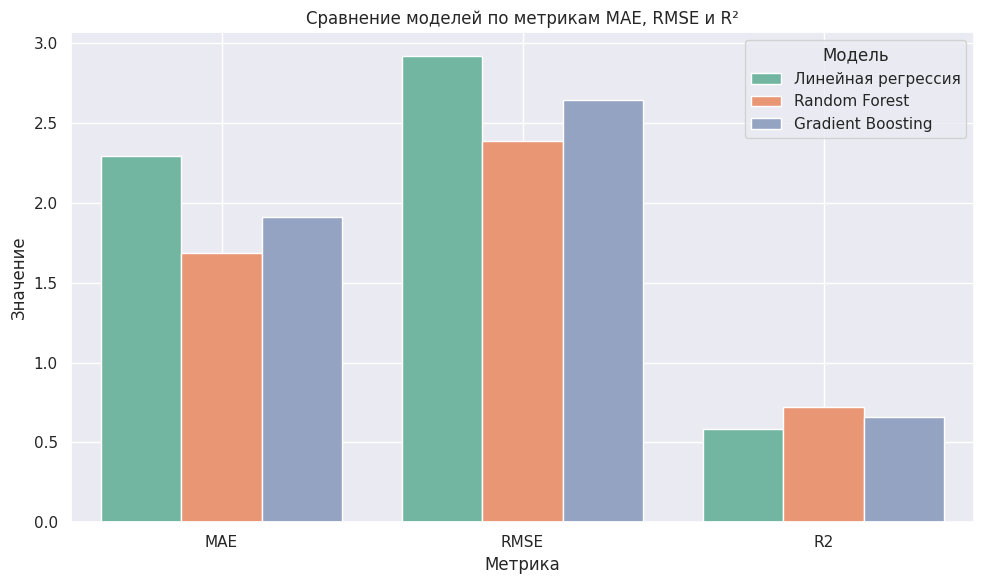

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Словарь для хранения метрик
metrics = {}

# Обучение моделей и расчет метрик
models = {
    'Линейная регрессия': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=200, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=15000, learning_rate=0.07, random_state=42)
}

# Обучение и предсказания
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    metrics[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}

# Преобразуем словарь в DataFrame
metrics_df = pd.DataFrame(metrics).T.reset_index().rename(columns={'index': 'Модель'})

# Построим график
plt.figure(figsize=(10, 6))
metrics_melted = metrics_df.melt(id_vars='Модель', var_name='Метрика', value_name='Значение')
sns.barplot(data=metrics_melted, x='Метрика', y='Значение', hue='Модель', palette='Set2')
plt.title('Сравнение моделей по метрикам MAE, RMSE и R²')
plt.ylabel('Значение')
plt.xlabel('Метрика')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Модель')
plt.show()


In [75]:
#Увеличение количества ветвлений до 15000 тысяч со 150 так же дает негативный эффект и метрики качества градиентого бустинга хуже всех

SyntaxError: invalid syntax (<ipython-input-75-2f13046e5469>, line 1)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Словарь для хранения метрик
metrics = {}

# Обучение моделей и расчет метрик
models = {
    'Линейная регрессия': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=200, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=150, learning_rate=0.07, random_state=42)
}

# Обучение и предсказания
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    metrics[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}

# Преобразуем словарь в DataFrame
metrics_df = pd.DataFrame(metrics).T.reset_index().rename(columns={'index': 'Модель'})

# Построим график
plt.figure(figsize=(10, 6))
metrics_melted = metrics_df.melt(id_vars='Модель', var_name='Метрика', value_name='Значение')
sns.barplot(data=metrics_melted, x='Метрика', y='Значение', hue='Модель', palette='Set2')
plt.title('Сравнение моделей по метрикам MAE, RMSE и R²')
plt.ylabel('Значение')
plt.xlabel('Метрика')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Модель')
plt.show()


В этой связи можно сделать вывод что градиентый бустинг важжно правильно подбирать  шаг обучения чтобы не перепрынуть минимум как при 0,7 но и найти его так как при 0,0007 градиент затухает и не способен найти минимум